## ***Author :*** [***`Fawad Ali Shaikh`***](https://www.kaggle.com/fawadalishaikh)
##***Competition :***[***`Binary Classification with a Bank Churn Dataset`***](https://www.kaggle.com/competitions/playground-series-s4e1/overview)

- ***Linkedin :***[***`Fawad Ali`***](https://www.linkedin.com/in/fawad-ali5/)
- ***Github :***[***`Fawad5`***](https://github.com/Fawad5/)

In [10]:
!pip install kaggle

In [11]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [12]:
! cp kaggle.json ~/.kaggle/

In [13]:
! chmod 600 ~/.kaggle/kaggle.json

In [14]:
! kaggle competitions download binary-classification-with-a-bank-churn-dataset-1


  0% 0.00/637k [00:00<?, ?B/s]
100% 637k/637k [00:00<00:00, 81.6MB/s]


In [15]:
! unzip /content/binary-classification-with-a-bank-churn-dataset-1.zip


Archive:  /content/binary-classification-with-a-bank-churn-dataset-1.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


### ***Import Libraries***

In [16]:
# to handle data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# to preprocess data

from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# deep learning tasks
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import EarlyStopping



#metrics
from sklearn.metrics import accuracy_score,precision_score, f1_score ,recall_score ,confusion_matrix, classification_report, mean_absolute_error,mean_squared_error,r2_score

# ignore warnings

import warnings
warnings.filterwarnings('ignore')

### ***Load The Data***

In [17]:
# train data

df_train = pd.read_csv('train.csv')
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15665943.0,Nnamutaezinwa,616.0,Germany,Female,29.0,1.0,164947.05,2.0,0.0,1.0,183584.14,0.0
1,1,15623220.0,Yermakov,642.0,France,Female,29.0,7.0,0.00,2.0,1.0,1.0,139919.38,0.0
2,2,15690670.0,Hsieh,537.0,France,Male,38.0,1.0,86055.17,1.0,1.0,1.0,125422.66,0.0
3,3,15683053.0,Chidumaga,609.0,Germany,Female,34.0,2.0,105420.08,2.0,1.0,1.0,91366.42,0.0
4,4,15736228.0,Hsing,588.0,France,Female,35.0,4.0,0.00,2.0,1.0,1.0,151887.16,0.0


In [18]:
# test data

df_test = pd.read_csv('test.csv')
df_test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15606861.0,P'eng,687.0,France,Female,34.0,3.0,0.00,2.0,0.0,1.0,177784.68
1,15001,15747265.0,Shubin,762.0,France,Male,33.0,10.0,0.00,2.0,1.0,1.0,149535.97
2,15002,15684908.0,Chibugo,647.0,France,Male,29.0,7.0,0.00,2.0,1.0,1.0,169415.61
3,15003,15805764.0,Ikedinachukwu,590.0,France,Male,27.0,2.0,0.00,2.0,1.0,0.0,184524.74
4,15004,15709387.0,Hs?,616.0,Spain,Male,29.0,7.0,125710.53,1.0,0.0,1.0,166682.57


In [19]:
# sample_submission file

df_sample = pd.read_csv('sample_submission.csv')
df_sample.head()

,id,Exited
0,15000,0.5
1,15001,0.5
2,15002,0.5
3,15003,0.5
4,15004,0.5


### ***Let's Begin With Exploratory Data Analysis (EDA) ✌️***

In [20]:
print('In Train dataset')
print(f'Number of rows: {df_train.shape[0]}')
print(f'Number of columns: {df_train.shape[1]}')
print('------------------------')
print('In Test dataset')
print(f'Number of rows: {df_test.shape[0]}')
print(f'Number of columns: {df_test.shape[1]}')

In Train dataset
Number of rows: 15000
Number of columns: 14
------------------------
In Test dataset
Number of rows: 10000
Number of columns: 13


In [21]:
# columns in train

df_train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [22]:
# columns in test

df_test.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [23]:
# Information about train dataset

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [24]:
# Information about test dataset

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10000 non-null  int64  
 1   CustomerId       10000 non-null  float64
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  float64
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  float64
 10  HasCrCard        10000 non-null  float64
 11  IsActiveMember   10000 non-null  float64
 12  EstimatedSalary  10000 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 1015.8+ KB


In [25]:
# Summary of train dataset in transpose

df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,15000.0,7.499500e+03,4.330271e+03,0.00,3749.75,7499.50,11249.25,1.499900e+04
CustomerId,15000.0,1.591025e+07,1.806311e+07,15565701.00,15633870.00,15690670.00,15757843.00,1.580657e+09
CreditScore,15000.0,6.579522e+02,7.314624e+01,431.00,601.00,661.00,708.00,8.500000e+02
Age,15000.0,3.785280e+01,8.207210e+00,18.00,32.00,37.00,42.00,7.400000e+01
Tenure,15000.0,5.015667e+00,2.771245e+00,0.00,3.00,5.00,7.00,1.000000e+01
Balance,15000.0,4.255361e+04,5.955889e+04,0.00,0.00,0.00,108895.93,1.878420e+05
NumOfProducts,15000.0,1.581467e+00,5.310825e-01,1.00,1.00,2.00,2.00,4.000000e+00
HasCrCard,15000.0,7.834000e-01,4.119414e-01,0.00,1.00,1.00,1.00,1.000000e+00
IsActiveMember,15000.0,4.986667e-01,5.000149e-01,0.00,0.00,0.00,1.00,1.000000e+00
EstimatedSalary,15000.0,1.185088e+05,1.204743e+05,11.55,82820.85,123475.83,155851.21,1.377892e+07


In [26]:
# Unique values in train datset

print('Unique values in Train dataset\n')
print(df_train.nunique())

Unique values in Train dataset

id                 15000
CustomerId          6311
Surname              778
CreditScore          376
Geography              3
Gender                 2
Age                   56
Tenure                11
Balance             3294
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     6264
Exited                 2
dtype: int64


### ***Check Null Values 🚫***

In [27]:
# Check null values

print(df_train.isnull().sum().sort_values(ascending=False)/len(df_train)*100)

id                 0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64


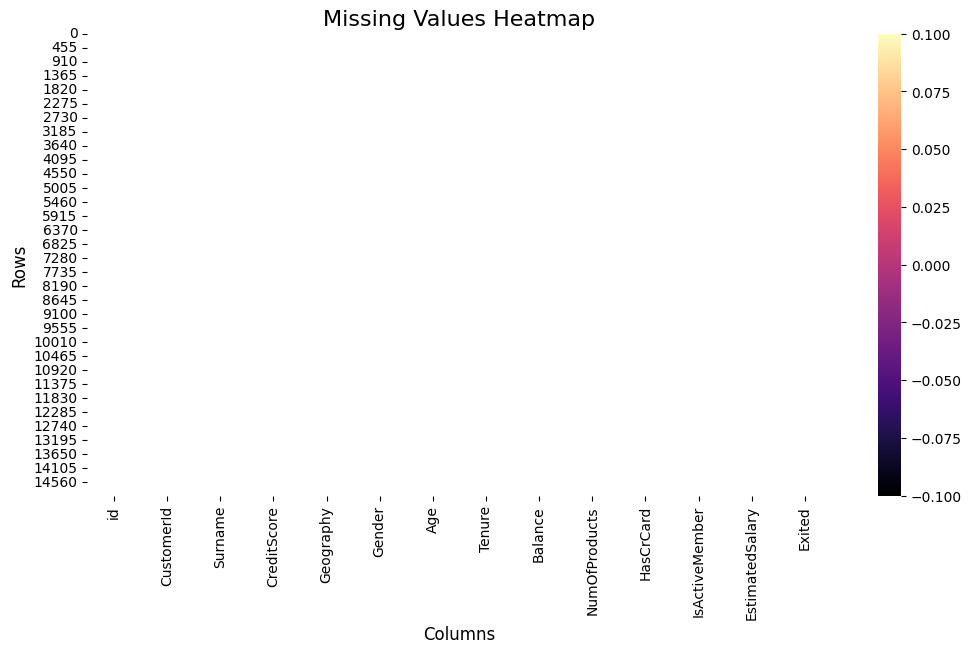

In [28]:
# plot it using seaborn

fig = plt.figure(figsize=(12, 6))
sns.heatmap(df_train.isnull(), cmap='magma', annot=False, fmt='.2f', linewidths=.5)
plt.title('Missing Values Heatmap', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Rows', fontsize=12)

plt.show()

* ***So, we have 0 null values***

### ***Let's Deal with Outliers ⚠️***

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [30]:
# split data into numerical & categorical columns

num_cols = [col for col in df_train.columns if df_train[col].dtype!='O']
cat_cols = [col for col in df_train.columns if col not in num_cols]


In [31]:
# numerical columns

num_cols

['id',
 'CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

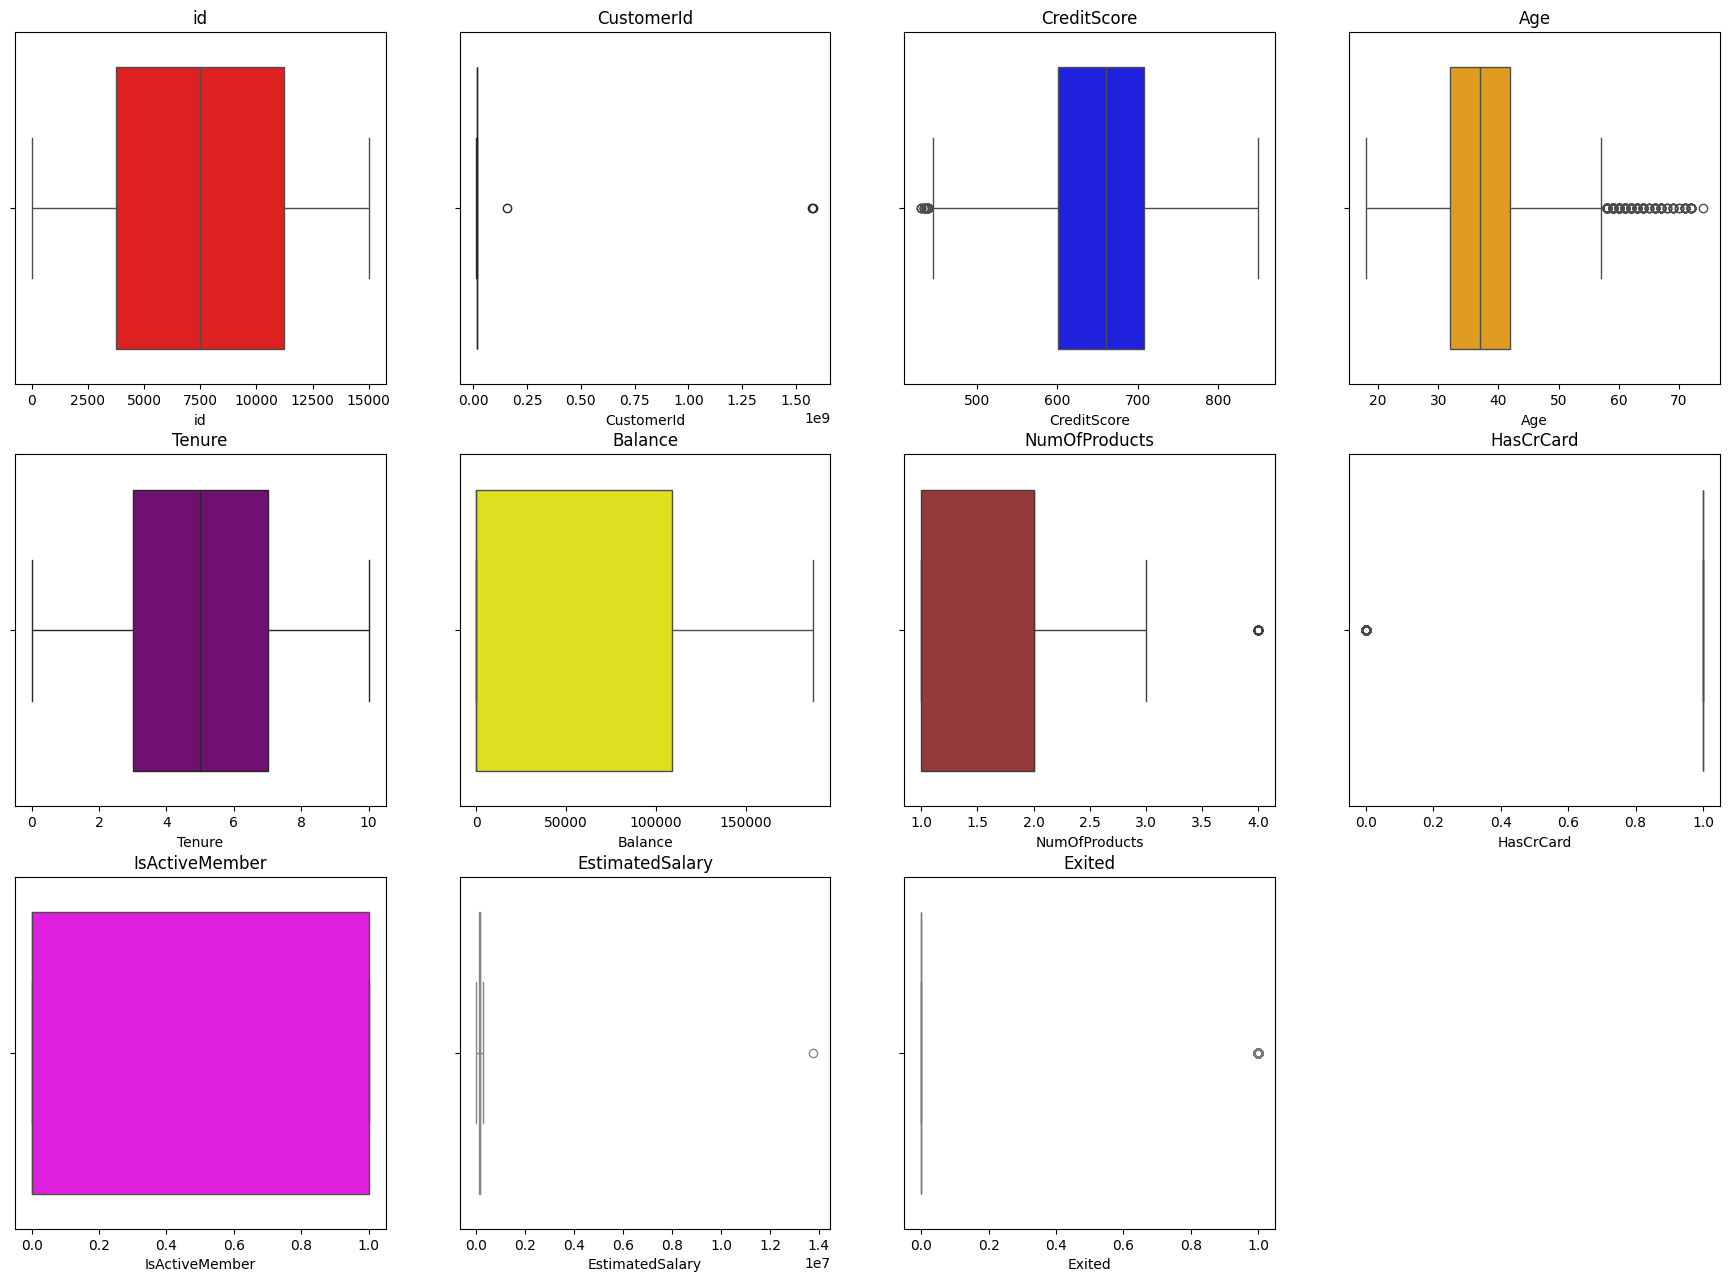

In [32]:
# make Boxplot of numeric columns using for loop
plt.figure(figsize=(22, 32))

# Extend the colors list to have at least as many colors as num_cols
colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'brown', 'cyan', 'magenta','pink','lightblue']

# Calculate the number of rows needed based on the number of columns
num_rows = (len(num_cols) + 1) // 2  # Divide by 2 and round up

for i, col in enumerate(num_cols):
    plt.subplot(num_rows, 4, i+1)  # Adjusted to dynamic rows, 2 columns
    sns.boxplot(x=df_train[col], color=colors[i % len(colors)]) # Use modulo operator to cycle through colors
    plt.title(col)
plt.show()

***It doesn't give useful insights***

### ***Let's make plots (Numeric Columns) 📊***

In [33]:
df = df_train.copy()

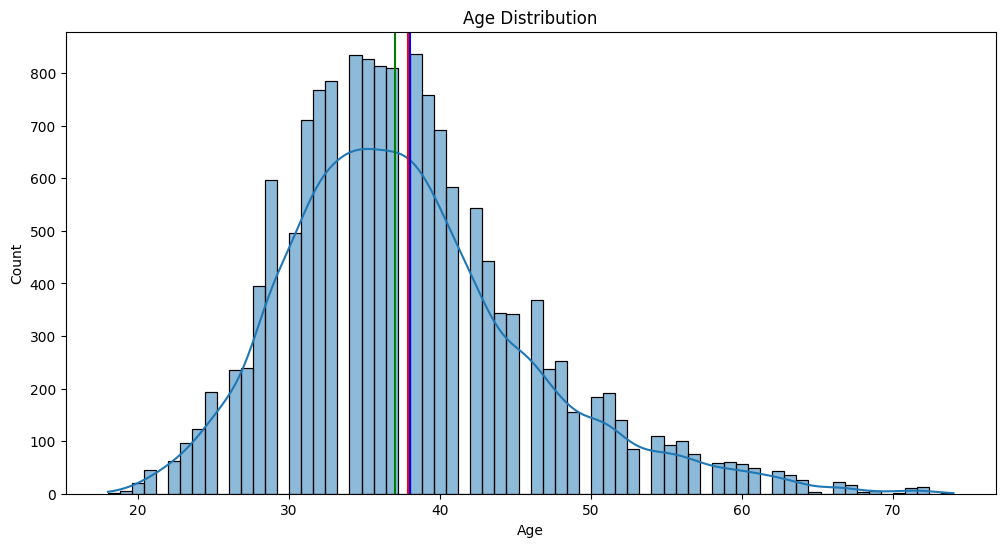

-----------------------
Mean 37.8528
Median 37.0
Mode 0    38.0
Name: Age, dtype: float64


In [34]:
# Explore age column

# histplot of age using seaborn

fig = plt.figure(figsize=(12,6))
sns.histplot(df['Age'], kde=True)
plt.axvline(df['Age'].mean(),color='red')
plt.axvline(df['Age'].median(),color='green')
plt.axvline(df['Age'].mode()[0],color='blue')
plt.title('Age Distribution')
plt.show()

# print the values of mean, median & mode
print("-----------------------")
print('Mean',df['Age'].mean())
print('Median',df['Age'].median())
print('Mode',df['Age'].mode())


* ***Somehow data is Gaussian (normally) distributed***

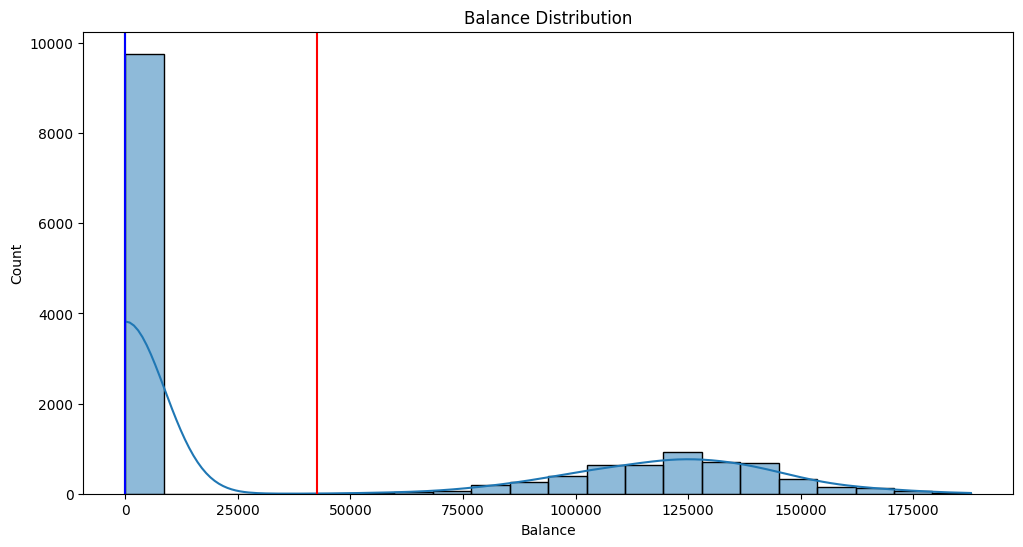

-----------------------
Mean 42553.61342733333
Median 0.0
Mode 0    0.0
Name: Balance, dtype: float64


In [35]:
# Explore Balance column

# histplot of age using seaborn

fig = plt.figure(figsize=(12,6))
sns.histplot(df['Balance'], kde=True)
plt.axvline(df['Balance'].mean(),color='red')
plt.axvline(df['Balance'].median(),color='green')
plt.axvline(df['Balance'].mode()[0],color='blue')
plt.title('Balance Distribution')
plt.show()

# print the values of mean, median & mode
print("-----------------------")
print('Mean',df['Balance'].mean())
print('Median',df['Balance'].median())
print('Mode',df['Balance'].mode())


* ***It is not Gaussian (normally) distributed***

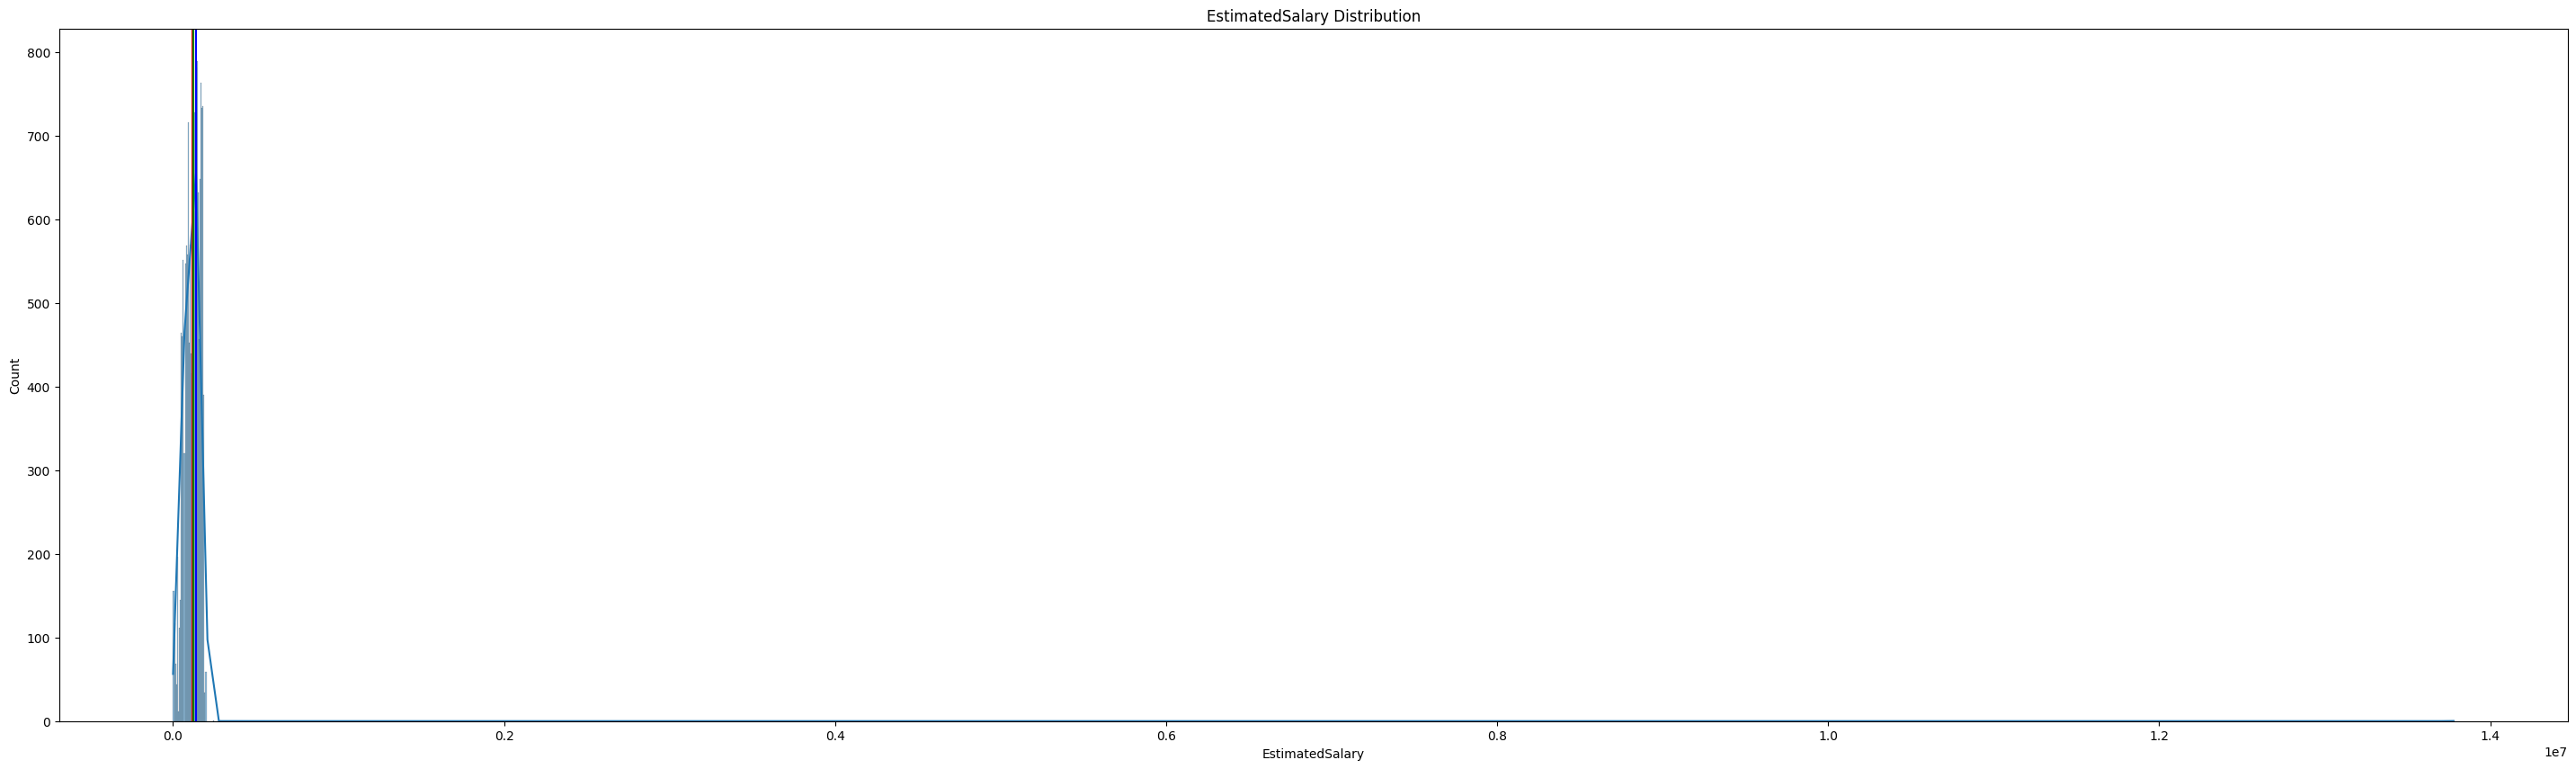

-----------------------
Mean 118508.84770799999
Median 123475.83
Mode 0    140941.47
1    166677.35
Name: EstimatedSalary, dtype: float64


In [36]:
# Explore EstimatedSalary column

# histplot of EstimatedSalary using seaborn

fig = plt.figure(figsize=(36,10))
sns.histplot(df['EstimatedSalary'], kde=True)
plt.axvline(df['EstimatedSalary'].mean(),color='red')
plt.axvline(df['EstimatedSalary'].median(),color='green')
plt.axvline(df['EstimatedSalary'].mode()[0],color='blue')
plt.title('EstimatedSalary Distribution')
plt.show()

# print the values of mean, median & mode
print("-----------------------")
print('Mean',df['EstimatedSalary'].mean())
print('Median',df['EstimatedSalary'].median())
print('Mode',df['EstimatedSalary'].mode())


* ***It is not Gaussian (normally) distributed***

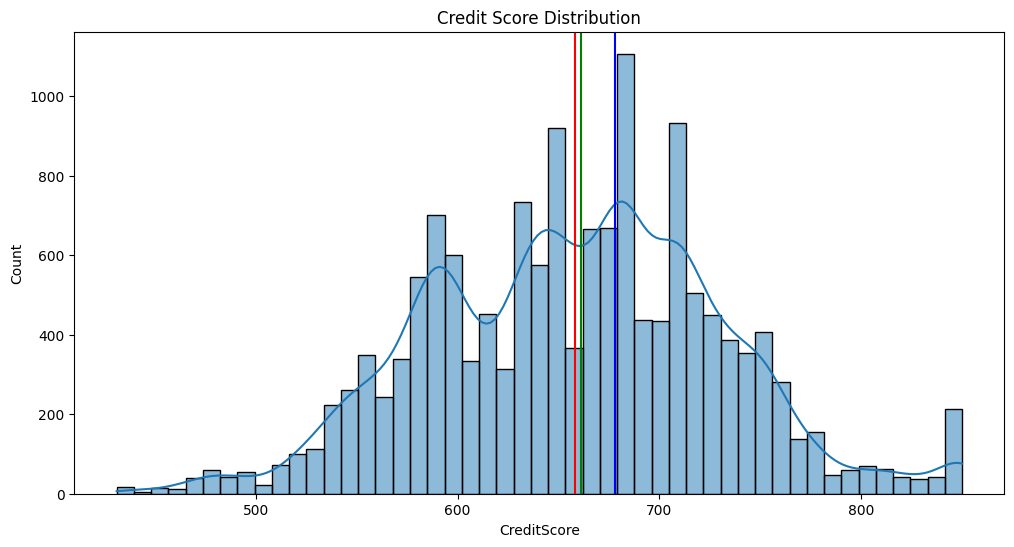

-----------------------
Mean 657.9522
Median 661.0
Mode 0    678.0
Name: CreditScore, dtype: float64


In [37]:
# Explore Credit Score column

# histplot of Credit Score using seaborn

fig = plt.figure(figsize=(12,6))
sns.histplot(df['CreditScore'], kde=True)
plt.axvline(df['CreditScore'].mean(),color='red')
plt.axvline(df['CreditScore'].median(),color='green')
plt.axvline(df['CreditScore'].mode()[0],color='blue')
plt.title('Credit Score Distribution')
plt.show()

# print the values of mean, median & mode
print("-----------------------")
print('Mean',df['CreditScore'].mean())
print('Median',df['CreditScore'].median())
print('Mode',df['CreditScore'].mode())


* ***Somehow data is Gaussian (normally) distributed***

### ***Let's make plots (Categorical Columns) 📊***

In [38]:
cat_cols

['Surname', 'Geography', 'Gender']

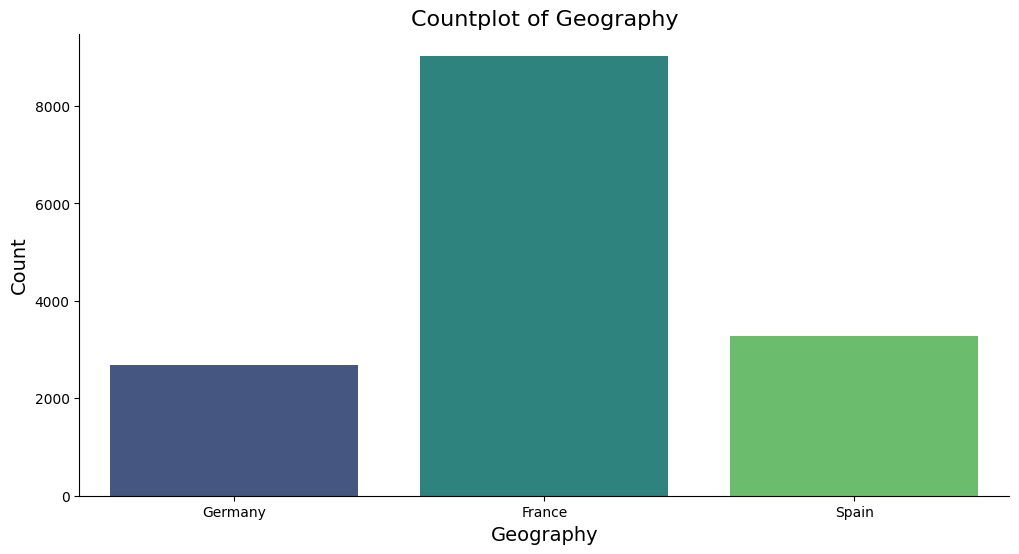

In [39]:
# countplot of Geography

fig = plt.figure(figsize=(12, 6))
sns.countplot(df, x='Geography', palette='viridis')  # Use a color palette
plt.title('Countplot of Geography', fontsize=16, fontweight='medium')  # Enhance title
plt.xlabel('Geography', fontsize=14)  # Enhance x-axis label
plt.ylabel('Count', fontsize=14)  # Enhance y-axis label
plt.xticks(fontsize=10)  # Enhance x-axis tick labels
plt.yticks(fontsize=10)  # Enhance y-axis tick labels
sns.despine()  # Remove top and right spines for a cleaner look

plt.show()

* ***This shows France has the most counts***
* ***Spain has more counts than Germany***

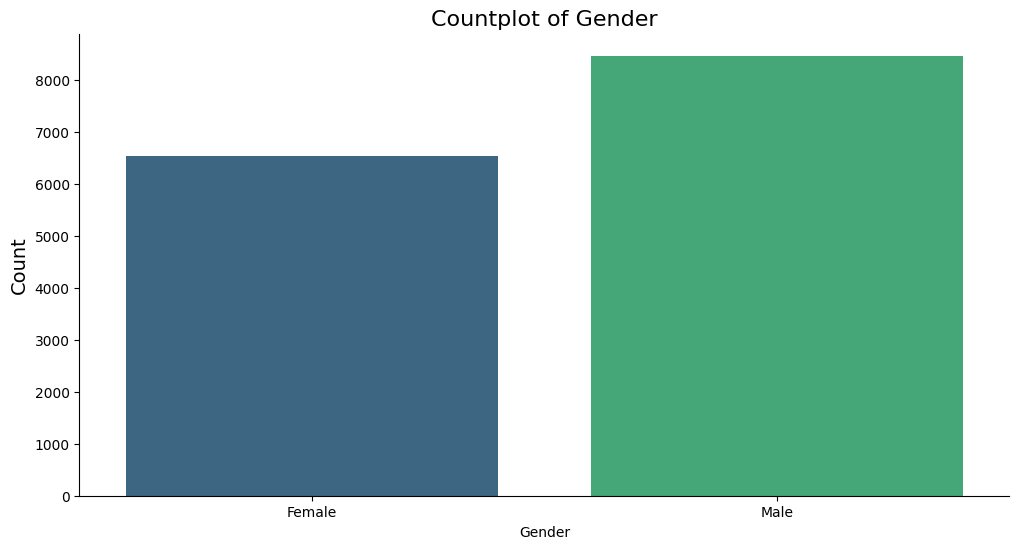

In [40]:
# countplot of Gender

fig = plt.figure(figsize=(12,6))
sns.countplot(df,x ='Gender',palette='viridis')
plt.title('Countplot of Gender', fontsize=16, fontweight='medium')
plt.ylabel('Count', fontsize=14)  # Enhance y-axis label
plt.xticks(fontsize=10)  # Enhance x-axis tick labels
plt.yticks(fontsize=10)  # Enhance y-axis tick labels
sns.despine()  # Remove top and right spines for a cleaner look
plt.show()

***We have more males than females***

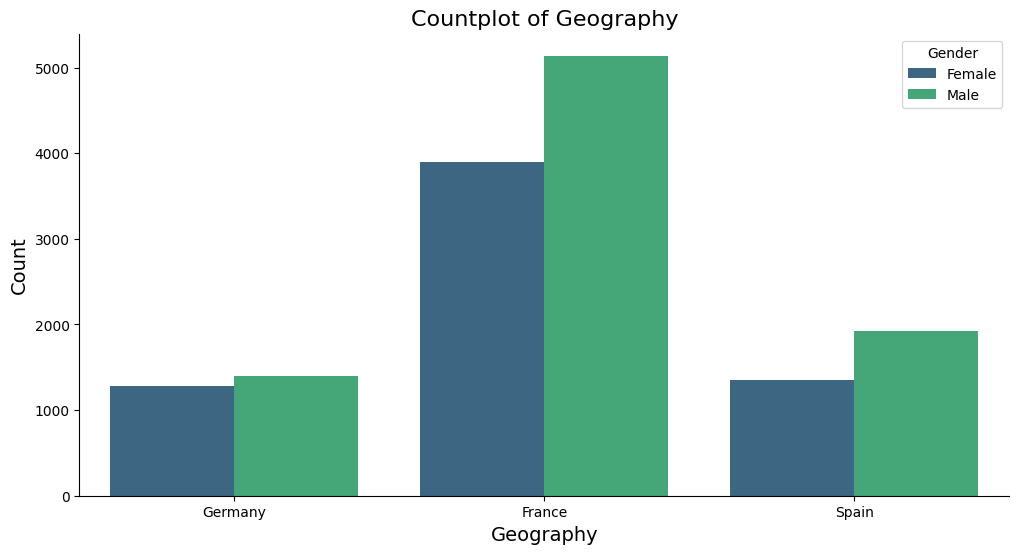

In [41]:
# countplot of Geography based on Gender

fig = plt.figure(figsize=(12, 6))
sns.countplot(df, x='Geography', palette='viridis', hue='Gender')  # Use a color palette
plt.title('Countplot of Geography', fontsize=16, fontweight='medium')  # Enhance title
plt.xlabel('Geography', fontsize=14)  # Enhance x-axis label
plt.ylabel('Count', fontsize=14)  # Enhance y-axis label
plt.xticks(fontsize=10)  # Enhance x-axis tick labels
plt.yticks(fontsize=10)  # Enhance y-axis tick labels
sns.despine()  # Remove top and right spines for a cleaner look


plt.show()

* ***France has highest number of males & females***
* ***Germany has almost same number of males & females***
* ***Spain has more number of males than females***


In [42]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15665943.0,Nnamutaezinwa,616.0,Germany,Female,29.0,1.0,164947.05,2.0,0.0,1.0,183584.14,0.0
1,1,15623220.0,Yermakov,642.0,France,Female,29.0,7.0,0.00,2.0,1.0,1.0,139919.38,0.0
2,2,15690670.0,Hsieh,537.0,France,Male,38.0,1.0,86055.17,1.0,1.0,1.0,125422.66,0.0
3,3,15683053.0,Chidumaga,609.0,Germany,Female,34.0,2.0,105420.08,2.0,1.0,1.0,91366.42,0.0
4,4,15736228.0,Hsing,588.0,France,Female,35.0,4.0,0.00,2.0,1.0,1.0,151887.16,0.0


### ***Pre-Processing***

In [43]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,15000.000000,1.500000e+04,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000
mean,7499.500000,1.591025e+07,657.952200,37.85280,5.015667,42553.613427,1.581467,0.783400,0.498667,1.185088e+05,0.207733
std,4330.271354,1.806311e+07,73.146243,8.20721,2.771245,59558.894027,0.531083,0.411941,0.500015,1.204743e+05,0.405698
min,0.000000,1.556570e+07,431.000000,18.00000,0.000000,0.000000,1.000000,0.000000,0.000000,1.155000e+01,0.000000
25%,3749.750000,1.563387e+07,601.000000,32.00000,3.000000,0.000000,1.000000,1.000000,0.000000,8.282085e+04,0.000000
50%,7499.500000,1.569067e+07,661.000000,37.00000,5.000000,0.000000,2.000000,1.000000,0.000000,1.234758e+05,0.000000
75%,11249.250000,1.575784e+07,708.000000,42.00000,7.000000,108895.930000,2.000000,1.000000,1.000000,1.558512e+05,0.000000
max,14999.000000,1.580657e+09,850.000000,74.00000,10.000000,187841.990000,4.000000,1.000000,1.000000,1.377892e+07,1.000000


In [44]:
# Scale creditscore, balance, estimatedsalary in train data using standard scalar

df['CreditScore'] = StandardScaler().fit_transform(df[['CreditScore']])
df['Balance'] = StandardScaler().fit_transform(df[['Balance']])
df['EstimatedSalary'] = StandardScaler().fit_transform(df[['EstimatedSalary']])


In [45]:
# encode categorical columns in train data separately using label encoder

df['Geography'] = LabelEncoder().fit_transform(df['Geography'])
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])


In [46]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15665943.0,Nnamutaezinwa,-0.573558,1,0,29.0,1.0,2.055067,2.0,0.0,1.0,0.540177,0.0
1,1,15623220.0,Yermakov,-0.218094,0,0,29.0,7.0,-0.714503,2.0,1.0,1.0,0.177725,0.0
2,2,15690670.0,Hsieh,-1.653622,0,1,38.0,1.0,0.730420,1.0,1.0,1.0,0.057390,0.0
3,3,15683053.0,Chidumaga,-0.669260,1,0,34.0,2.0,1.055570,2.0,1.0,1.0,-0.225304,0.0
4,4,15736228.0,Hsing,-0.956365,0,0,35.0,4.0,-0.714503,2.0,1.0,1.0,0.277067,0.0


In [47]:
# Scale creditscore, balance, estimatedsalary in test data using standard scalar

df_test['CreditScore'] = StandardScaler().fit_transform(df_test[['CreditScore']])
df_test['Balance'] = StandardScaler().fit_transform(df_test[['Balance']])
df_test['EstimatedSalary'] = StandardScaler().fit_transform(df_test[['EstimatedSalary']])


In [48]:
# encode categorical columns in test data separately using label encoder

df_test['Geography'] = LabelEncoder().fit_transform(df_test['Geography'])
df_test['Gender'] = LabelEncoder().fit_transform(df_test['Gender'])


In [49]:
df_test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15606861.0,P'eng,0.389392,0,0,34.0,3.0,-0.721066,2.0,0.0,1.0,1.261008
1,15001,15747265.0,Shubin,1.420527,0,1,33.0,10.0,-0.721066,2.0,1.0,1.0,0.663539
2,15002,15684908.0,Chibugo,-0.160546,0,1,29.0,7.0,-0.721066,2.0,1.0,1.0,1.084000
3,15003,15805764.0,Ikedinachukwu,-0.944209,0,1,27.0,2.0,-0.721066,2.0,1.0,0.0,1.403563
4,15004,15709387.0,Hs?,-0.586749,2,1,29.0,7.0,1.376060,1.0,0.0,1.0,1.026195


### ***Let's Conquer The Empire Of Deep Learning 🎯***

In [50]:
# Check Columns

df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [51]:
# Define features and target

X = df.drop(['id', 'CustomerId', 'Surname','Exited'], axis=1)
y = df['Exited']

df_test = df_test.drop(['id', 'CustomerId', 'Surname'], axis=1)

In [52]:
# Spilit the data into X train and y train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
df_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.389392,0,0,34.0,3.0,-0.721066,2.0,0.0,1.0,1.261008
1,1.420527,0,1,33.0,10.0,-0.721066,2.0,1.0,1.0,0.663539
2,-0.160546,0,1,29.0,7.0,-0.721066,2.0,1.0,1.0,1.084000
3,-0.944209,0,1,27.0,2.0,-0.721066,2.0,1.0,0.0,1.403563
4,-0.586749,2,1,29.0,7.0,1.376060,1.0,0.0,1.0,1.026195


Epoch 1/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7782 - loss: 0.5447 - val_accuracy: 0.8608 - val_loss: 0.3567
Epoch 2/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8410 - loss: 0.3836 - val_accuracy: 0.8583 - val_loss: 0.3446
Epoch 3/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8539 - loss: 0.3583 - val_accuracy: 0.8550 - val_loss: 0.3601
Epoch 4/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8462 - loss: 0.3728 - val_accuracy: 0.8258 - val_loss: 0.4240
Epoch 5/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8550 - loss: 0.3696 - val_accuracy: 0.8633 - val_loss: 0.3367
Epoch 6/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8575 - loss: 0.3567 - val_accuracy: 0.8625 - val_loss: 0.3421
Epoch 7/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8496 - loss: 0.3674 - val_accuracy: 0.8658 - val_loss: 0.3325
Epoch 8/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8563 - loss: 0.3574 - val_accu

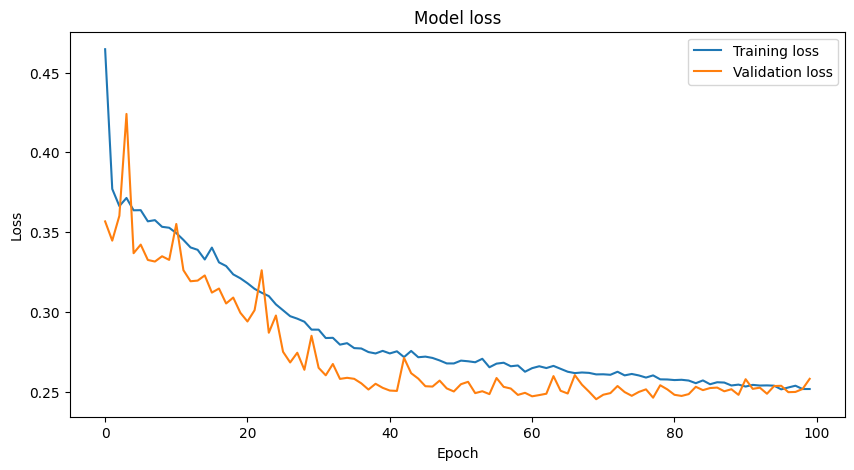

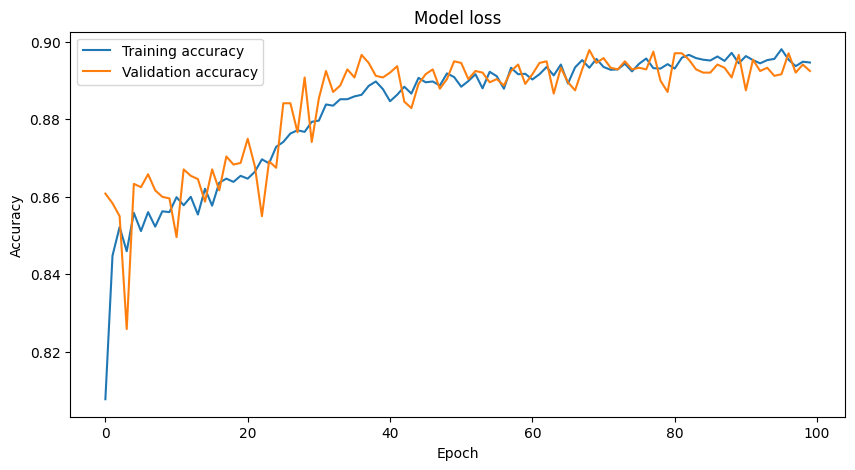

In [54]:
# Create neural network for binary classification

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu')) # Input layer

model.add(Dense(32, activation='relu')) # Hidden layer

model.add(Dense(1, activation='sigmoid')) # Output layer


# Compile the model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose = 1)

# Evaluating the model
loss = model.evaluate(X_test, y_test, verbose=0)
loss

print("--------------------------------")
print("Loss: ", loss[0])
print("Accuracy: ", loss[1])

# Plot the training loss and accuracy at each epoch

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(history.history['loss'], label='Training loss')
ax.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
ax.legend()
plt.show()

# Plot the testing loss and accuracy at each epoch

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(history.history['accuracy'], label='Training accuracy')
ax.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Model loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
ax.legend()
plt.show()


### ***Call Back Function (For Early Stopping Of Neural Network)***

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7018 - loss: 1.1110 - val_accuracy: 0.8553 - val_loss: 0.3651
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8421 - loss: 0.3749 - val_accuracy: 0.8487 - val_loss: 0.3527
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8521 - loss: 0.3629 - val_accuracy: 0.8520 - val_loss: 0.3530
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8485 - loss: 0.3701 - val_accuracy: 0.8537 - val_loss: 0.3506
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8499 - loss: 0.3622 - val_accuracy: 0.8547 - val_loss: 0.3486
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8522 - loss: 0.3588 - val_accuracy: 0.8643 - val_loss: 0.3297
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8569 - loss: 0.3553 - val_accuracy: 0.8707 - val_loss: 0.3199
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8542 - loss: 0.3562 - val_accu

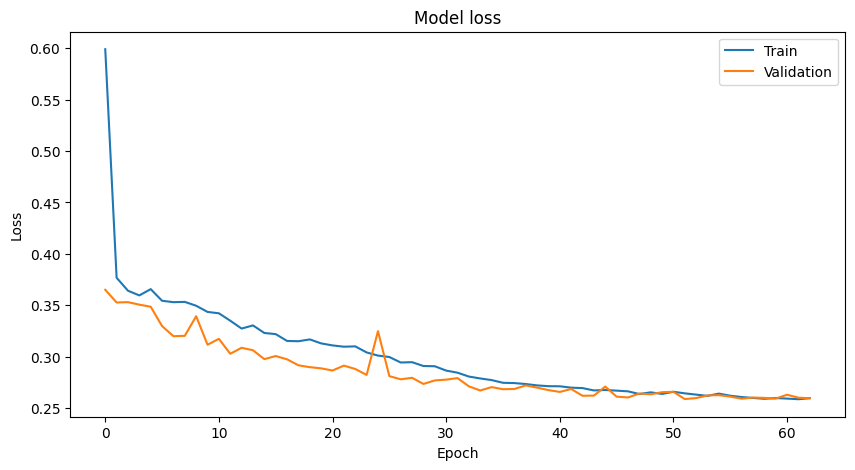

In [55]:
# Building the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for regression
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the callback function
early_stopping = EarlyStopping(patience=11)

# Train the model with the callback function
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# Evaluating the model
loss = model.evaluate(X_test, y_test, verbose=0)
loss

print("--------------------------------")
print("Loss: ", loss[0])
print("Accuracy: ", loss[1])

# Plotting the training and testing loss
plt.subplots(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [56]:
# Prediction

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to class labels (0 or 1)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


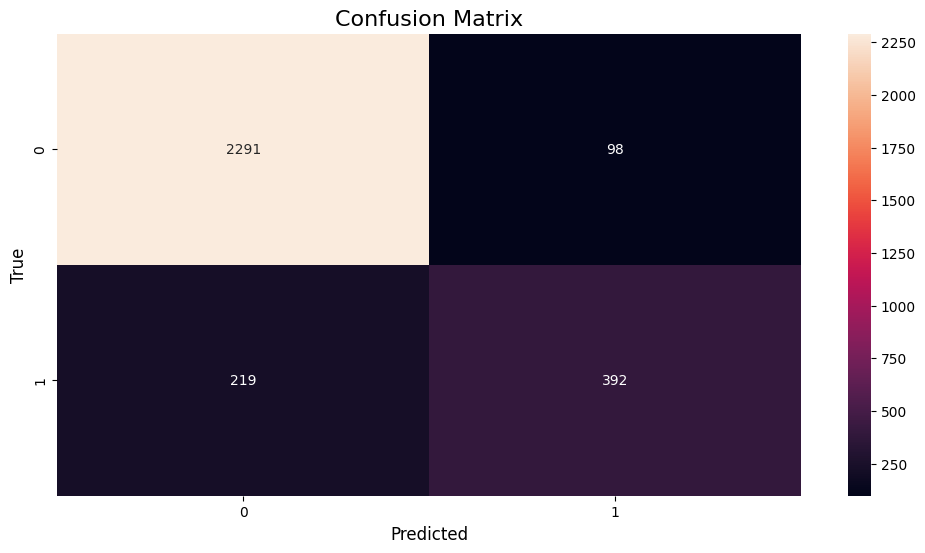

In [57]:
# plot the confusion matrix

fig = plt.figure(figsize=(12, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix', fontsize=16, fontweight='medium')  # Enhance title
plt.xlabel('Predicted', fontsize=12)  # Enhance x-axis label
plt.ylabel('True', fontsize=12)  # Enhance y-axis label

plt.show()

In [58]:
# create a submission file

# Ensure y_pred has the same length as df_sample
y_pred_full = model.predict(df_test) # Predict on the entire test data
y_pred_full = (y_pred_full > 0.5).astype(int)

df_sample['Exited'] = y_pred_full  # Assign the full predictions to the DataFrame
df_sample.to_csv('submission.csv', index=False)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
